In [4]:
!pip install pandas faker numpy matplotlib -q

In [5]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

# Configuración
fake = Faker()
np.random.seed(42)  # Para reproducibilidad

Matplotlib is building the font cache; this may take a moment.


In [6]:
def generate_sales_data(n_rows=1000, output_path="data/raw_sales.csv"):
    """
    Genera datos simulados de ventas minoristas.
    - 180 tiendas (como en el artículo)
    - Fechas en el último año
    - Productos variados
    - Simula inconsistencias reales: store_id con formatos diferentes
    """
    data = []
    stores = [f"NW-{i:03d}" for i in range(1, 181)]  # NW-001 a NW-180

    for _ in range(n_rows):
        sale_date = fake.date_between(start_date="-1y", end_date="today")
        # Simulamos inconsistencias en store_id (como en el artículo)
        store_format = np.random.choice([0, 1, 2])
        if store_format == 0:
            store_id = f"NW-{np.random.randint(1, 181):02d}"
        elif store_format == 1:
            store_id = f"NW{np.random.randint(1, 181):03d}"
        else:
            store_id = f"{np.random.randint(1, 181):03d}-NW"

        customer_id = fake.uuid4()
        product = fake.random_element(elements=["Laptop", "Smartphone", "Tablet", "Headphones", "Monitor"])
        quantity = np.random.randint(1, 6)
        price = round(np.random.uniform(50, 1200), 2)
        total = quantity * price
        status = np.random.choice(["Completed", "Pending", "Cancelled", "Returned"], p=[0.8, 0.1, 0.05, 0.05])

        # Simulamos algunos valores nulos (problemas reales)
        if np.random.random() < 0.05:
            price = None
        if np.random.random() < 0.03:
            status = None

        data.append([sale_date, store_id, customer_id, product, quantity, price, total, status])

    df = pd.DataFrame(data, columns=["sale_date", "store_id", "customer_id", "product", "quantity", "price", "total", "status"])
    
    # Guardar en la carpeta data/
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df.to_csv(output_path, index=False)
    print(f"Datos generados y guardados en: {output_path}")
    print(f"Filas generadas: {len(df)}")
    return df

In [8]:
df_raw_data = generate_sales_data(n_rows=5000, output_path="data/raw_sales.csv")

Datos generados y guardados en: data/raw_sales.csv
Filas generadas: 5000


In [12]:
df_raw = pd.read_csv("/Users/ikkar/Documents/Github projects/medallion-architecture-project/etapa1-fundamentos/data/raw_sales.csv")

In [ ]:
# Vista rápida
df_raw.head(10)

,sale_date,store_id,customer_id,product,quantity,price,total,status
0,2025-07-27,NW-166,8b1ff910-f298-4568-8f85-d7879a818f90,Smartphone,2,1190.42,2380.84,Completed
1,2025-01-15,NW017,03afe752-6931-46bf-a7f2-f1d57ddba376,Headphones,1,1026.98,1026.98,Completed
2,2025-03-12,NW055,7d3928fa-7308-4afb-9c1f-0759e812d758,Monitor,1,NaN,575.75,Returned
3,2025-03-14,NW-142,9670544b-48ea-4a5d-946b-1798f7d40349,Smartphone,5,1084.00,5420.00,Completed
4,2025-09-16,078-NW,7a87eccb-7518-413b-934e-29ee2534a622,Laptop,3,647.28,1941.84,Returned
5,2025-11-12,NW-58,bf44f36f-c84e-4d56-adc4-097cbab57428,Tablet,2,91.34,182.68,Completed
6,2025-10-19,NW-13,1eeb2704-6a48-4ead-a8e5-67b555bb48c4,Tablet,1,769.24,769.24,Completed
7,2025-06-12,136-NW,a0d3c9ac-531d-4926-9662-22fce6043aba,Monitor,1,840.62,840.62,Completed
8,2025-09-11,NW042,0420828c-10e6-4e37-b625-dcd990ad2472,Smartphone,2,217.09,434.18,Completed
9,2025-05-05,NW064,7d1b7ea0-c83e-4fa2-9cd7-27afe3bc188f,Laptop,4,158.85,635.40,Completed


In [ ]:
# Información general
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sale_date    5000 non-null   object 
 1   store_id     5000 non-null   object 
 2   customer_id  5000 non-null   object 
 3   product      5000 non-null   object 
 4   quantity     5000 non-null   int64  
 5   price        4763 non-null   float64
 6   total        5000 non-null   float64
 7   status       4861 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 312.6+ KB


In [ ]:
# Estadísticas básicas
df_raw.describe()

,quantity,price,total
count,5000.000000,4763.000000,5000.000000
mean,3.005600,628.523294,1894.677266
std,1.423086,332.637665,1426.259009
min,1.000000,50.110000,50.110000
25%,2.000000,340.150000,753.735000
50%,3.000000,630.170000,1504.420000
75%,4.000000,914.015000,2809.742500
max,5.000000,1199.930000,5999.650000


In [ ]:
# Conteo de valores únicos por columna categórica
for col in ['store_id', 'product','status']:
    print(f'\nValores únicos en {col}: ')
    print(df_raw[col].value_counts().head(10))


Valores únicos en store_id: 
store_id
NW-11     19
NW-09     19
167-NW    18
NW-131    18
098-NW    17
NW015     17
084-NW    17
NW-99     17
NW-150    17
NW-142    16
Name: count, dtype: int64

Valores únicos en product: 
product
Monitor       1045
Laptop        1015
Tablet        1001
Smartphone     976
Headphones     963
Name: count, dtype: int64

Valores únicos en status: 
status
Completed    3902
Pending       467
Cancelled     263
Returned      229
Name: count, dtype: int64


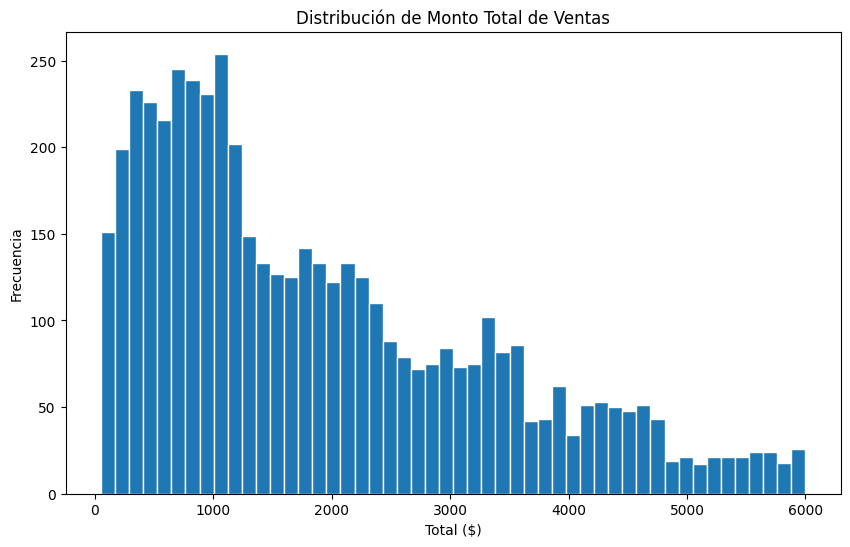

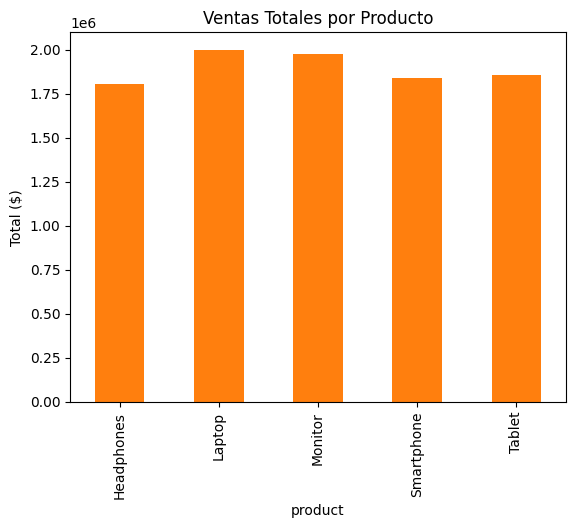

In [17]:
# Distribución de ventas totales
plt.figure(figsize=(10, 6))
plt.hist(df_raw["total"].dropna(), bins=50, color="#1f77b4", edgecolor="white")
plt.title("Distribución de Monto Total de Ventas")
plt.xlabel("Total ($)")
plt.ylabel("Frecuencia")
plt.show()

# Ventas por producto
df_raw.groupby("product")["total"].sum().plot(kind="bar", color="#ff7f0e")
plt.title("Ventas Totales por Producto")
plt.ylabel("Total ($)")
plt.show()